# Basic Utils

## Package Utils

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

%matplotlib inline

# machine learning
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 8 , 6

## Plot Utils

In [2]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_histograms( df , variables , n_rows , n_cols ):
    fig = plt.figure( figsize = ( 16 , 12 ) )
    for i, var_name in enumerate( variables ):
        ax=fig.add_subplot( n_rows , n_cols , i+1 )
        df[ var_name ].hist( bins=10 , ax=ax )
        ax.set_title( 'Skew: ' + str( round( float( df[ var_name ].skew() ) , ) ) ) # + ' ' + var_name ) #var_name+" Distribution")
        ax.set_xticklabels( [] , visible=False )
        ax.set_yticklabels( [] , visible=False )
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

def plot_distribution( df , var , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col )
    facet.map( sns.kdeplot , var , shade= True )
    facet.set( xlim=( 0 , df[ var ].max() ) )
    facet.add_legend()

def plot_categories( df , cat , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , row = row , col = col )
    facet.map( sns.barplot , cat , target )
    facet.add_legend()

def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 9 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        vmax=.8
    )
    
def plot_model_var_imp( model , X , y, num_features = 10):
    imp = pd.DataFrame( 
        model.feature_importances_  , 
        columns = [ 'Importance' ] , 
        index = X.columns 
    )
    imp = imp.sort_values( [ 'Importance' ] , ascending = True )
    imp[ -num_features: ].plot( kind = 'barh' )
    
    
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, scoring = None, 
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 9)):
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring = scoring)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")

def plot_corvariance( df, var, target = "SalePrice" ):
    data = pd.concat([df[target], df[var]], axis=1)
    data.plot.scatter(x=var, y=target)
    
def plot_box( df, var ):
    data = pd.concat([df['SalePrice'], df[var]], axis=1)
    f, ax = plt.subplots(figsize=(16, 8))
    fig = sns.boxplot(x=var, y="SalePrice", data=data)
    fig.axis(ymin=0, ymax=800000)
    plt.xticks(rotation=90)

In [3]:
pd.set_option('display.max_colwidth', -1)

# Loading data and basic stats

In [4]:
train_df = pd.read_csv('../input/train.csv')
test_df = pd.read_csv('../input/test.csv')

In [5]:
combine = [train_df, test_df]

## Data fields

Here's a brief version of what you'll find in the data description file.

- SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale

## Stats

### Sale price

In [6]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
train_df['SalePrice'].describe()

count    1460.000000  
mean     180921.195890
std      79442.502883 
min      34900.000000 
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [9]:
train_df['LandContour'].describe()

count     1460
unique    4   
top       Lvl 
freq      1311
Name: LandContour, dtype: object

In [10]:
train_df['BedroomAbvGr'].describe()

count    1460.000000
mean     2.866438   
std      0.815778   
min      0.000000   
25%      2.000000   
50%      3.000000   
75%      3.000000   
max      8.000000   
Name: BedroomAbvGr, dtype: float64

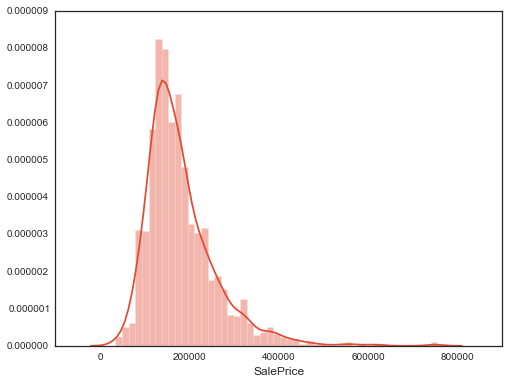

In [11]:
sns.distplot(train_df['SalePrice'])

In [12]:
#skewness and kurtosis
print("Skewness: %f" % train_df['SalePrice'].skew())
print("Kurtosis: %f" % train_df['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


In [13]:
train_df["Fireplaces"].describe()

count    1460.000000
mean     0.613014   
std      0.644666   
min      0.000000   
25%      0.000000   
50%      1.000000   
75%      1.000000   
max      3.000000   
Name: Fireplaces, dtype: float64

In [14]:
train_df["BsmtFinSF1"].describe()

count    1460.000000
mean     443.639726 
std      456.098091 
min      0.000000   
25%      0.000000   
50%      383.500000 
75%      712.250000 
max      5644.000000
Name: BsmtFinSF1, dtype: float64

In [15]:
train_df["YearRemodAdd"].describe()

count    1460.000000
mean     1984.865753
std      20.645407  
min      1950.000000
25%      1967.000000
50%      1994.000000
75%      2004.000000
max      2010.000000
Name: YearRemodAdd, dtype: float64

In [16]:
train_df[pd.notnull(train_df.PoolQC)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
197,198,75,RL,174.0,25419,Pave,NaN,Reg,Lvl,AllPub,...,512,Ex,GdPrv,NaN,0,3,2006,WD,Abnorml,235000
810,811,20,RL,78.0,10140,Pave,NaN,Reg,Lvl,AllPub,...,648,Fa,GdPrv,NaN,0,1,2006,WD,Normal,181000
1170,1171,80,RL,76.0,9880,Pave,NaN,Reg,Lvl,AllPub,...,576,Gd,GdPrv,NaN,0,7,2008,WD,Normal,171000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
1386,1387,60,RL,80.0,16692,Pave,NaN,IR1,Lvl,AllPub,...,519,Fa,MnPrv,TenC,2000,7,2006,WD,Normal,250000
1423,1424,80,RL,NaN,19690,Pave,NaN,IR1,Lvl,AllPub,...,738,Gd,GdPrv,NaN,0,8,2006,WD,Alloca,274970


In [17]:
train_df[ ["PoolQC", "SalePrice", "PoolArea"] ][pd.notnull(train_df.PoolQC)]

,PoolQC,SalePrice,PoolArea
197,Ex,235000,512
810,Fa,181000,648
1170,Gd,171000,576
1182,Ex,745000,555
1298,Gd,160000,480
1386,Fa,250000,519
1423,Gd,274970,738


/usr/local/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


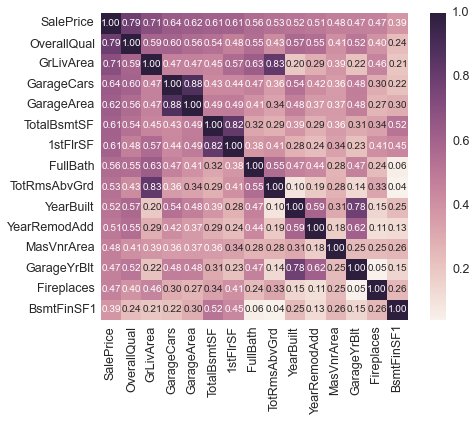

In [18]:
#saleprice correlation matrix
df = train_df.fillna(train_df.mean())
k = 15 #number of variables for heatmap
corrmat = df.corr()
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True,
                 fmt='.2f', annot_kws={'size': 10}, 
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show()

### Sales price vs numeric features

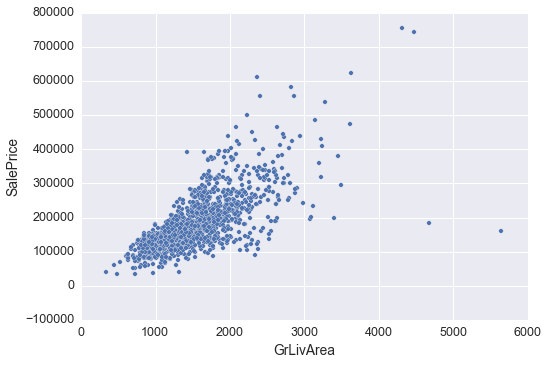

In [19]:
plot_corvariance(train_df, "GrLivArea")

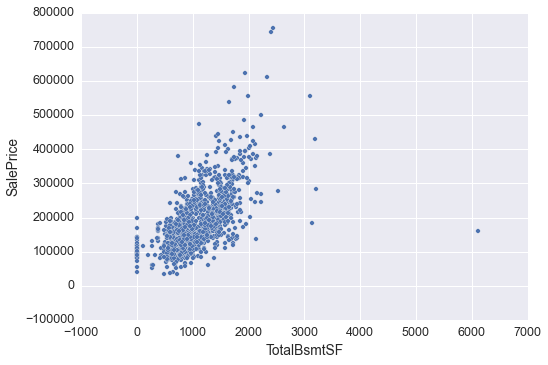

In [20]:
#scatter plot totalbsmtsf/saleprice
plot_corvariance(train_df, "TotalBsmtSF")

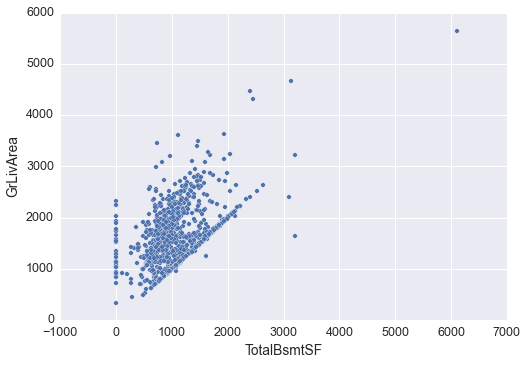

In [21]:
plot_corvariance(train_df, "TotalBsmtSF", "GrLivArea")

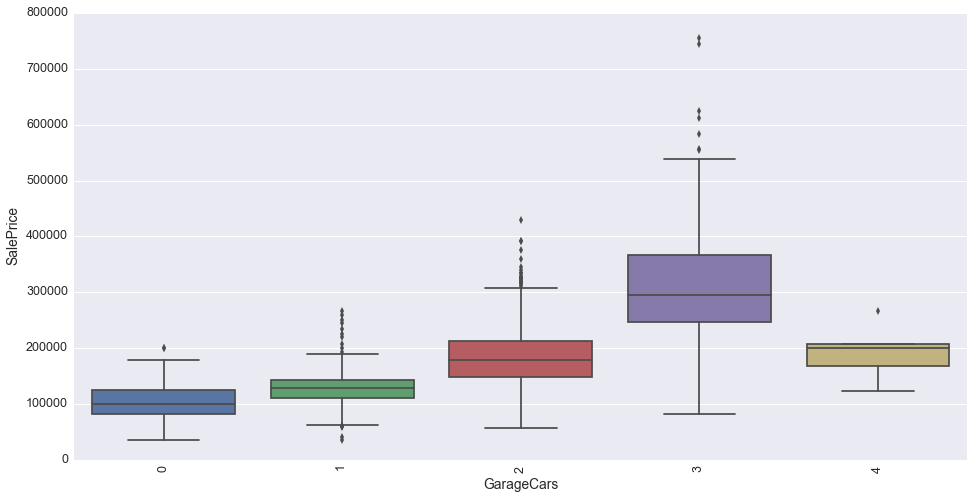

In [22]:
plot_box(train_df, "GarageCars")

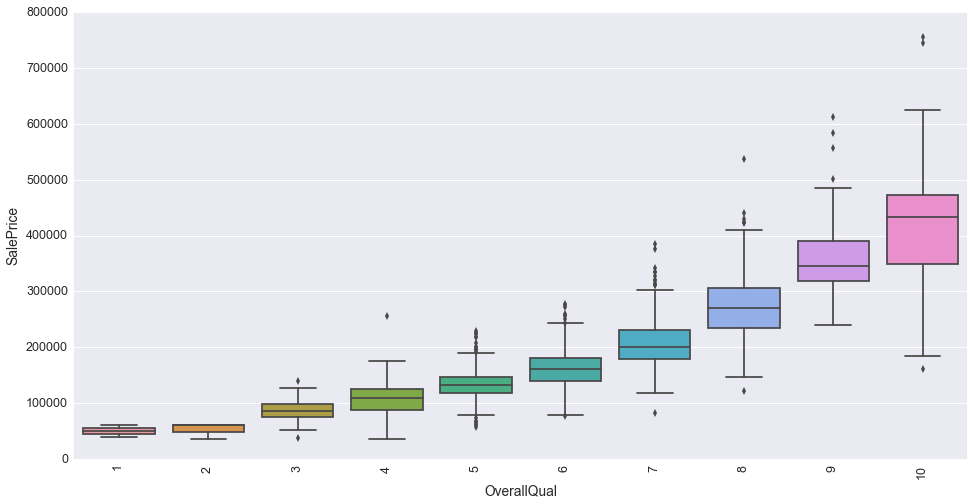

In [23]:
plot_box(train_df, "OverallQual")

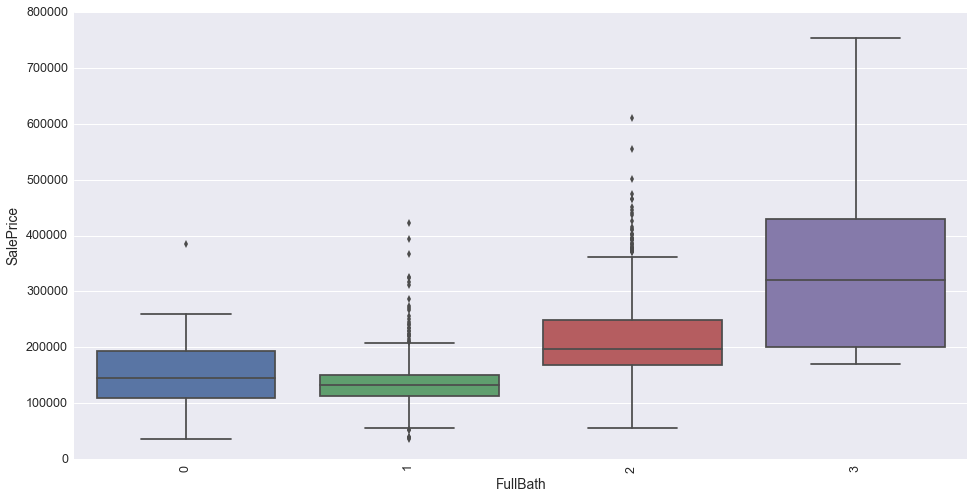

In [24]:
plot_box(train_df, "FullBath")

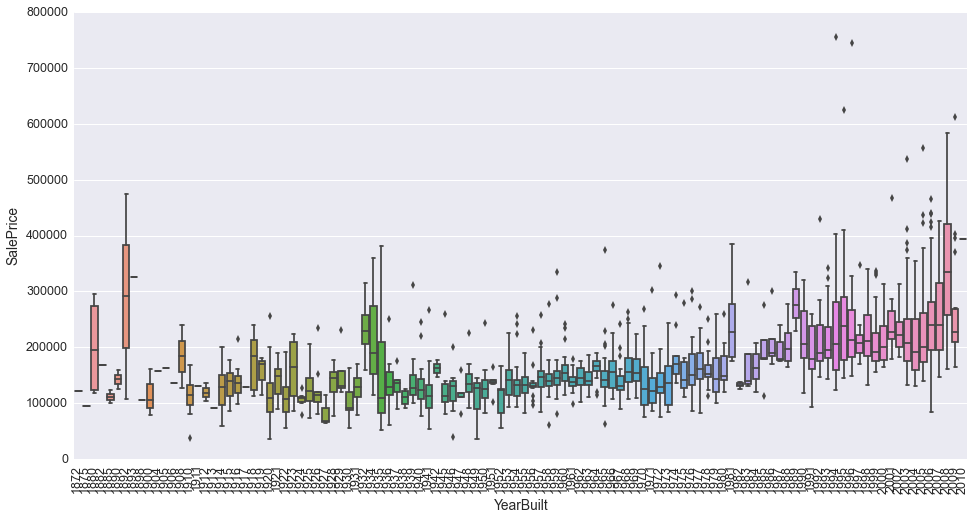

In [25]:
plot_box( train_df, "YearBuilt" )

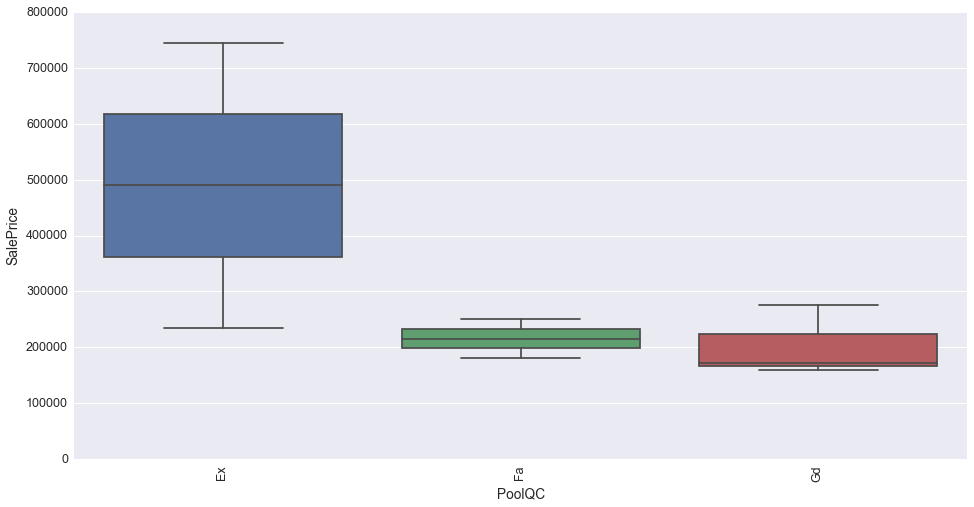

In [26]:
plot_box( train_df, "PoolQC" )

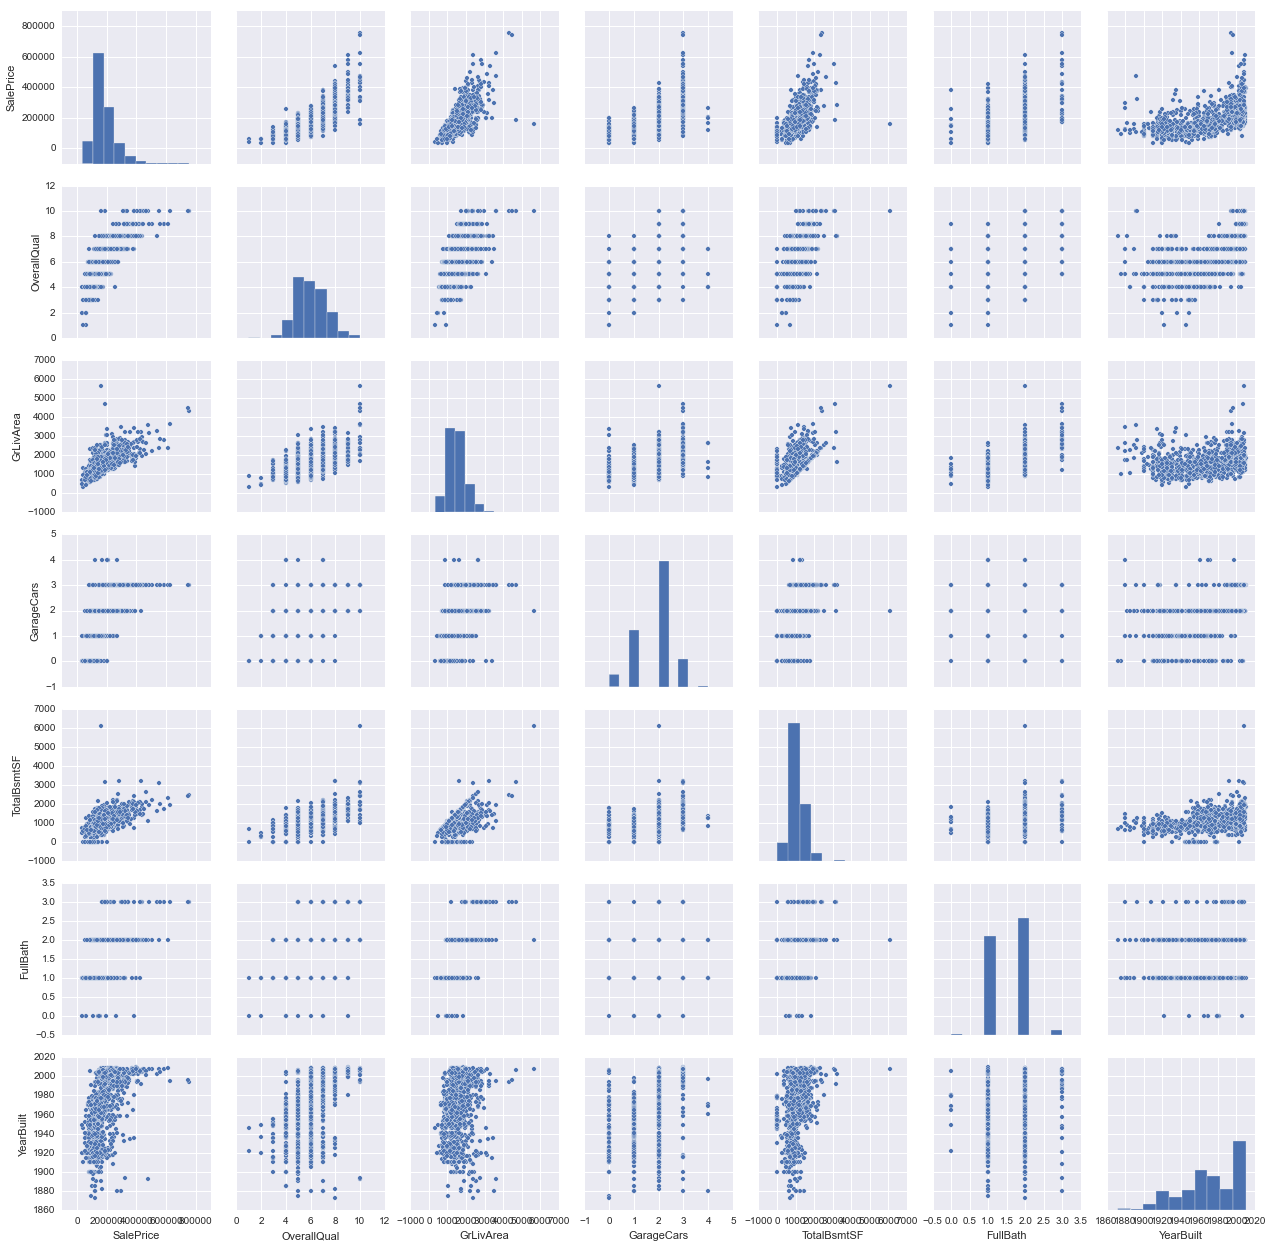

In [27]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train_df[cols], size = 2.5)
plt.show()

### Missing Values Investigation

In [30]:
#missing data
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data[missing_data.Percent > 0]

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


### Bivariate analysis¶

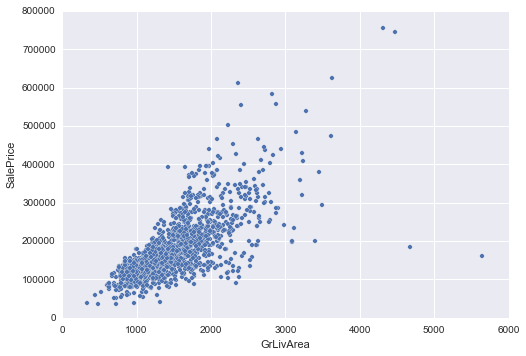

In [31]:
#bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [32]:
#deleting outliers
train_df.sort_values(by = 'GrLivArea', ascending = False)[:2]
train_df = train_df.drop(train_df[train_df['Id'] == 1299].index)
train_df = train_df.drop(train_df[train_df['Id'] == 524].index)

In [33]:
# Filter out records with GrLivArea < TotalBsmtSF which is sematically impossible
train_df = train_df.drop(train_df[train_df["GrLivArea"] < train_df["TotalBsmtSF"]].index)

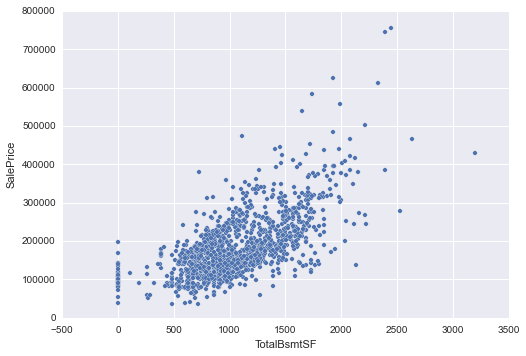

In [34]:
#bivariate analysis saleprice/grlivarea
var = 'TotalBsmtSF'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

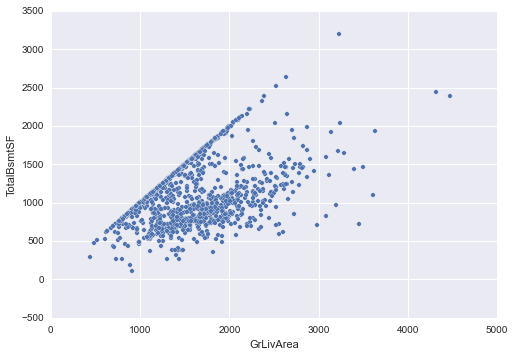

In [36]:
plot_corvariance(train_df[train_df["TotalBsmtSF"] > 0], "GrLivArea", "TotalBsmtSF")

We already did some data cleaning and discovered a lot about 'SalePrice'. Now it's time to go deep and understand how 'SalePrice' complies with the statistical assumptions that enables us to apply multivariate techniques.

According to Hair et al. (2013), four assumptions should be tested:

* <b>Normality</b> - When we talk about normality what we mean is that the data should look like a normal distribution. This is important because several statistic tests rely  on this (e.g. t-statistics). In this exercise we'll just check univariate normality for 'SalePrice' (which is a limited approach). Remember that univariate normality doesn't ensure multivariate normality (which is what we would like to have), but it helps. Another detail to take into account is that in big samples (>200 observations) normality is not such an issue. However, if we solve normality, we avoid a lot of other problems (e.g. heteroscedacity) so that's the main reason why we are doing this analysis.

* <b>Homoscedasticity</b> - I just hope I wrote it right. Homoscedasticity refers to the 'assumption that dependent variable(s) exhibit equal levels of variance across the range of predictor variable(s)' (Hair et al., 2013). Homoscedasticity is desirable because we want the error term to be the same across all values of the independent variables.

* <b>Linearity</b>- The most common way to assess linearity is to examine scatter plots and search for linear patterns. If patterns are not linear, it would be worthwhile to explore data transformations. However, we'll not get into this because most of the scatter plots we've seen appear to have linear relationships.

* <b>Absence of correlated errors</b> - Correlated errors, like the definition suggests, happen when one error is correlated to another. For instance, if one positive error makes a negative error systematically, it means that there's a relationship between these variables. This occurs often in time series, where some patterns are time related. We'll also not get into this. However, if you detect something, try to add a variable that can explain the effect you're getting. That's the most common solution for correlated errors.

What do you think Elvis would say about this long explanation? 'A little less conversation, a little more action please'? Probably... By the way, do you know what was Elvis's last great hit?

(...)

The bathroom floor.

In [37]:
#skewness and kurtosis
print("Skewness: %f" % train_df['SalePrice'].skew())
print("Kurtosis: %f" % train_df['SalePrice'].kurt())

Skewness: 1.868983
Kurtosis: 6.530013


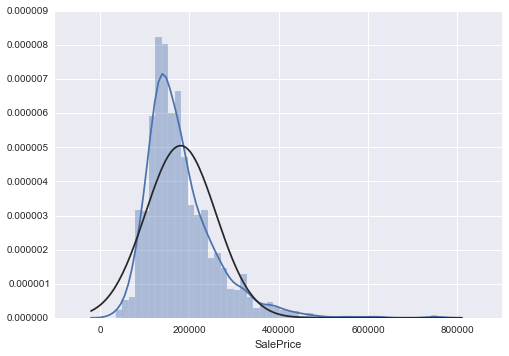

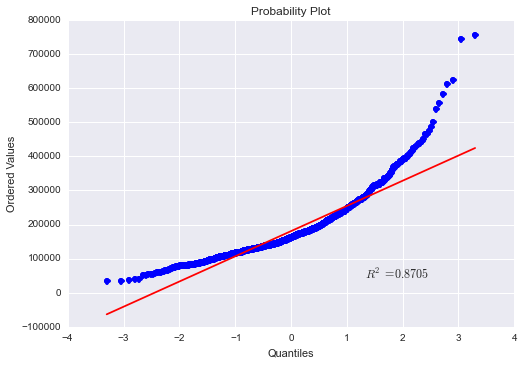

In [38]:
#histogram and normal probability plot
import seaborn as sns
from scipy.stats import norm
from scipy import stats

sns.distplot(train_df['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(train_df['SalePrice'], plot=plt)

In [39]:
#applying log transformation
train_df['SalePrice'] = np.log(train_df['SalePrice'])

In [40]:
#skewness and kurtosis
print("Skewness: %f" % train_df['SalePrice'].skew())
print("Kurtosis: %f" % train_df['SalePrice'].kurt())

Skewness: 0.113086
Kurtosis: 0.792036


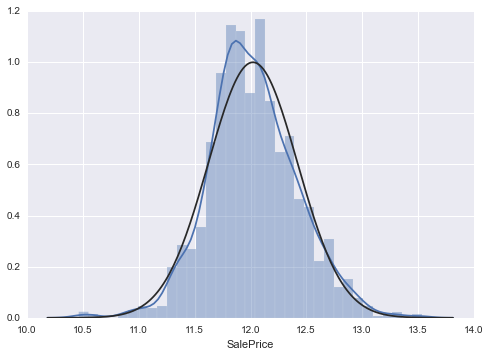

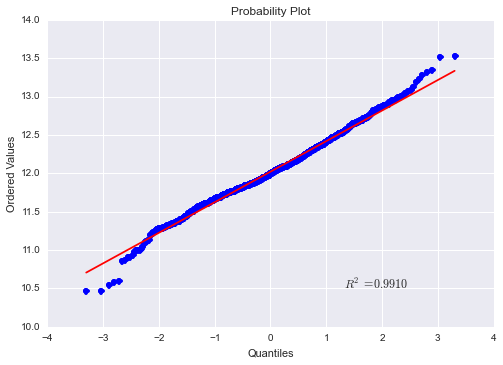

In [41]:
sns.distplot(train_df['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(train_df['SalePrice'], plot=plt)

In [42]:
#skewness and kurtosis
print("Skewness: %f" % train_df['GrLivArea'].skew())
print("Kurtosis: %f" % train_df['GrLivArea'].kurt())

Skewness: 1.006326
Kurtosis: 2.046796


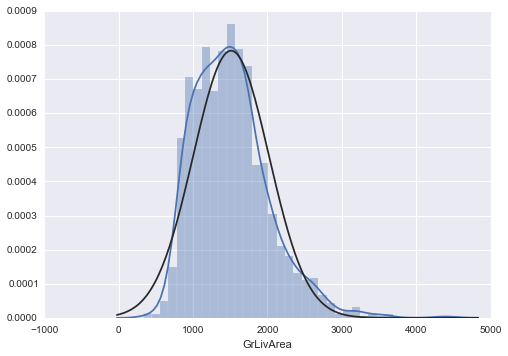

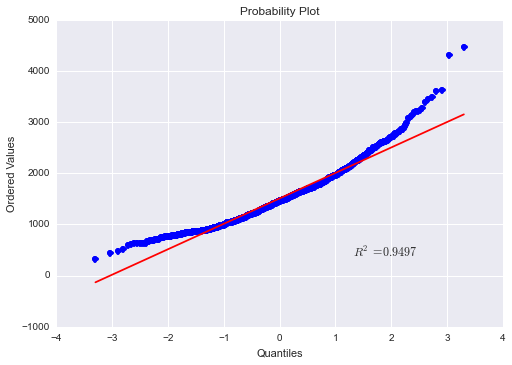

In [43]:
#histogram and normal probability plot
sns.distplot(train_df["GrLivArea"], fit=norm);
fig = plt.figure()
res = stats.probplot(train_df["GrLivArea"], plot=plt)

In [44]:
#applying log transformation
train_df['GrLivArea'] = np.log(train_df['GrLivArea'])

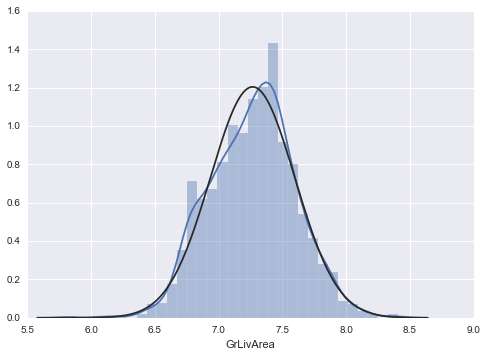

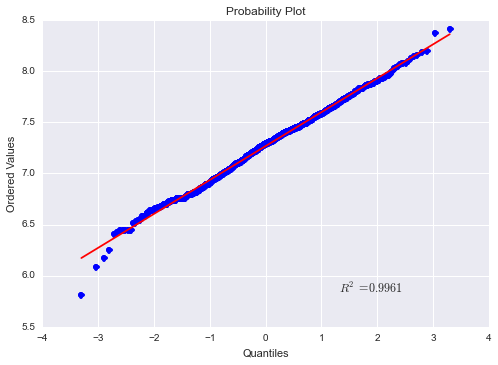

In [45]:
#histogram and normal probability plot
sns.distplot(train_df["GrLivArea"], fit=norm);
fig = plt.figure()
res = stats.probplot(train_df["GrLivArea"], plot=plt)

In [46]:
#skewness and kurtosis
print("Skewness: %f" % train_df['GrLivArea'].skew())
print("Kurtosis: %f" % train_df['GrLivArea'].kurt())

Skewness: -0.076071
Kurtosis: 0.086975


In [47]:
#skewness and kurtosis
print("Skewness: %f" % train_df['TotalBsmtSF'].skew())
print("Kurtosis: %f" % train_df['TotalBsmtSF'].kurt())

Skewness: 0.383466
Kurtosis: 1.192449


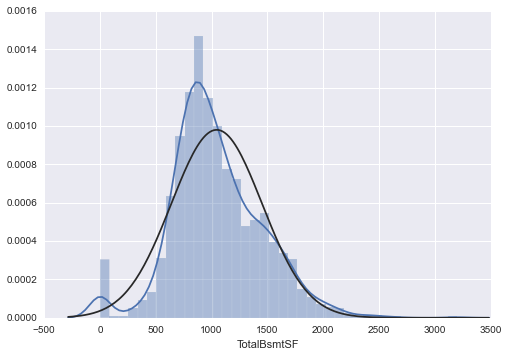

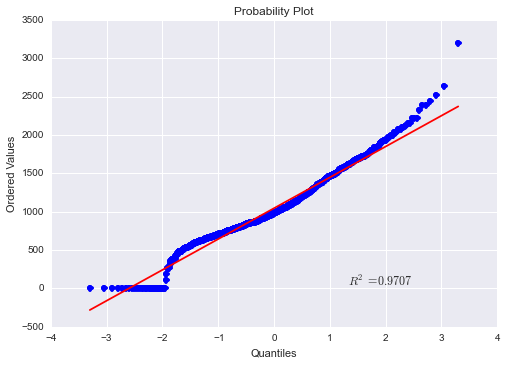

In [48]:
#histogram and normal probability plot
sns.distplot(train_df['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(train_df['TotalBsmtSF'], plot=plt)

In [49]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
train_df['HasBsmt'] = pd.Series(len(train_df['TotalBsmtSF']), index=train_df.index)
train_df['HasBsmt'] = 0 
train_df.loc[train_df['TotalBsmtSF']>0,'HasBsmt'] = 1

In [50]:
#transform data
train_df.loc[train_df['HasBsmt']==1,'TotalBsmtSF'] = np.log(train_df.loc[train_df['HasBsmt']==1,'TotalBsmtSF'])

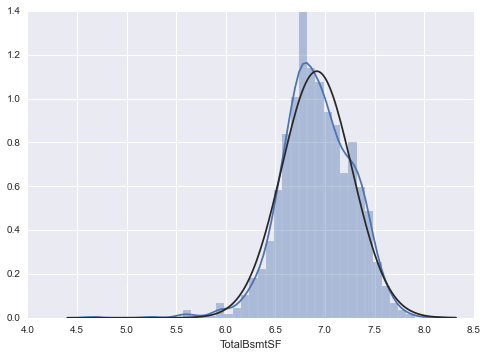

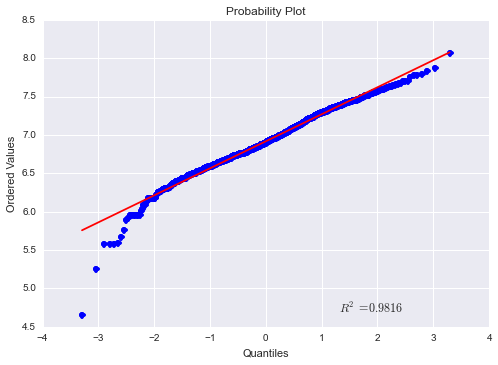

In [51]:
#histogram and normal probability plot
sns.distplot(train_df[train_df['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(train_df[train_df['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)


In [52]:
#skewness and kurtosis
print("Skewness: %f" % train_df[train_df['HasBsmt']==1]['TotalBsmtSF'].skew())
print("Kurtosis: %f" % train_df[train_df['HasBsmt']==1]['TotalBsmtSF'].kurt())

Skewness: -0.412595
Kurtosis: 1.637618


# Modeling

In [54]:
y = train_df["SalePrice"]
train_df = pd.get_dummies(train_df.drop(missing_data[missing_data.Percent > 0].index, axis = 1))
X = train_df.drop(["SalePrice", "Id"], axis = 1).fillna(train_df.mean())

In [55]:
X.shape

(1440, 214)

In [56]:
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error
mse_scorer = make_scorer(mean_squared_error)

In [57]:
from sklearn.model_selection import train_test_split

num_test = 0.20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=num_test, random_state=23)

In [58]:
from sklearn.cross_validation import KFold
train_size = X.shape[0]
def run_kfold(reg, n_folds = 10):
    kf = KFold(train_size, n_folds)
    outcomes = []
    fold = 0
    for train_index, test_index in kf:
        fold += 1
        X_train, X_test = X.values[train_index], X.values[test_index]
        y_train, y_test = y.values[train_index], y.values[test_index]
        reg.fit(X_train, y_train)
        predictions = reg.predict(X_test)
        mse = mean_squared_error(y_test, predictions)
        outcomes.append(mse)
        print("Fold {0} mse: {1}".format(fold, mse))
    mean_outcome = np.mean(outcomes)
    print("Mean MSE: {0}".format(mean_outcome)) 

/usr/local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [59]:
import math
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("Linear regressions rmse: %.3f" % math.sqrt(mean_squared_error(y_test, y_pred)))
print("Linear regressions mae: %.3f" % mean_absolute_error(y_test, y_pred))

Linear regressions rmse: 0.135
Linear regressions mae: 0.090


In [60]:
run_kfold(lr, 10)

Fold 1 mse: 0.0125366648929
Fold 2 mse: 0.00961703580334
Fold 3 mse: 0.0143279786348
Fold 4 mse: 0.0175206801032
Fold 5 mse: 0.0195915271087
Fold 6 mse: 0.0112408939402
Fold 7 mse: 0.0142112796972
Fold 8 mse: 0.00997667681786
Fold 9 mse: 0.0100086522521
Fold 10 mse: 0.0160641004939
Mean MSE: 0.0135095489744


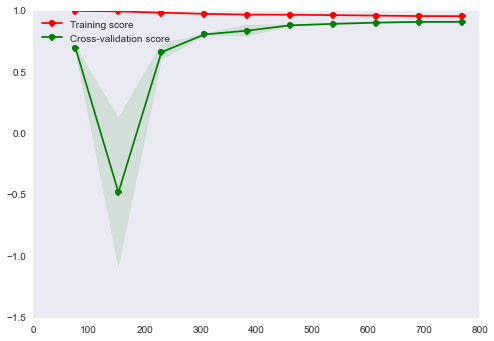

In [61]:
plot_learning_curve(lr, "Linear Regression", X_train, y_train, mse_scorer, train_sizes=np.linspace(.1, 1.0, 10))

In [62]:
lr_coef = pd.DataFrame({"name": X_train.columns, "coef": lr.coef_, "imp": np.abs(lr.coef_)})
lr_coef.sort_values("imp", ascending = False)

,coef,imp,name
98,-4.748928e-01,4.748928e-01,Condition2_RRAe
33,-4.593281e-01,4.593281e-01,HasBsmt
119,3.933503e-01,3.933503e-01,RoofStyle_Shed
34,-3.276775e-01,3.276775e-01,MSZoning_C (all)
121,3.249944e-01,3.249944e-01,RoofMatl_Metal
194,-2.604792e-01,2.604792e-01,Functional_Sev
13,2.526547e-01,2.526547e-01,GrLivArea
96,2.074364e-01,2.074364e-01,Condition2_PosA
175,-1.697620e-01,1.697620e-01,Heating_Grav
124,-1.646412e-01,1.646412e-01,RoofMatl_WdShake


In [70]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV

lasso = Lasso()
parameters = {"alpha": np.logspace(-3, -1, 5)}
grid_search = GridSearchCV(lasso, parameters, scoring=mse_scorer)
grid_search = grid_search.fit(X_train, y_train)
lasso = grid_search.best_estimator_
lasso.fit(X_train, y_train)

Lasso(alpha=0.10000000000000001, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [71]:
lasso_coef = pd.DataFrame({"name": X_train.columns, "coef": lasso.coef_, "imp": np.abs(lasso.coef_)})
lasso_coef.sort_values("imp", ascending = False)

,coef,imp,name
5,0.003353,0.003353,YearRemodAdd
4,0.002951,0.002951,YearBuilt
11,0.000361,0.000361,2ndFlrSF
10,0.000340,0.000340,1stFlrSF
23,0.000302,0.000302,GarageArea
28,0.000295,0.000295,ScreenPorch
0,-0.000278,0.000278,MSSubClass
6,0.000263,0.000263,BsmtFinSF1
26,0.000178,0.000178,EnclosedPorch
7,0.000167,0.000167,BsmtFinSF2


In [72]:
y_pred = lasso.predict(X_test)
print("Lasso mse: %.3f" % math.sqrt(mean_squared_error(y_test, y_pred)))

Lasso mse: 0.175


In [74]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
parameters = {"alpha": np.logspace(-1, 0, 5)}
grid_search = GridSearchCV(lasso, parameters, scoring=mse_scorer)
grid_search = grid_search.fit(X_train, y_train)
ridge = grid_search.best_estimator_
ridge.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [75]:
y_pred = ridge.predict(X_test)
print("Ridge mse: %.3f" % math.sqrt(mean_squared_error(y_test, y_pred)))

Ridge mse: 0.186


In [77]:
ridge_coef = pd.DataFrame({"name": X_train.columns, "coef": ridge.coef_, "imp": np.abs(ridge.coef_)})
ridge_coef.sort_values("imp", ascending = False)

,coef,imp,name
4,0.002231,0.002231,YearBuilt
5,0.001222,0.001222,YearRemodAdd
23,0.000381,0.000381,GarageArea
11,0.000371,0.000371,2ndFlrSF
10,0.000358,0.000358,1stFlrSF
6,0.000284,0.000284,BsmtFinSF1
8,0.000180,0.000180,BsmtUnfSF
7,0.000131,0.000131,BsmtFinSF2
24,0.000127,0.000127,WoodDeckSF
30,-0.000005,0.000005,MiscVal


In [82]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor()

parameters = {'n_estimators': [4, 6, 9], 
              'max_features': ['log2', 'sqrt','auto'], 
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,5,8]
             }

grid_search = GridSearchCV(rf, parameters, scoring=mse_scorer)
grid_search = grid_search.fit(X_train, y_train)
rf = grid_search.best_estimator_
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='log2', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=5,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=4, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [85]:
rf = RandomForestRegressor(max_depth = 2, min_samples_leaf = 5)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=5,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [86]:
y_pred = rf.predict(X_test)
print("Random Forest mse: %.3f" % math.sqrt(mean_squared_error(y_test, y_pred)))
print("Random Forest mae: %.3f" % mean_absolute_error(y_test, y_pred))

Random Forest mse: 0.222
Random Forest mae: 0.173


In [80]:
run_kfold(rf, 10)

Fold 1 mse: 0.0216589694255
Fold 2 mse: 0.0151996416758
Fold 3 mse: 0.0194968696632
Fold 4 mse: 0.019386981265
Fold 5 mse: 0.028294423348
Fold 6 mse: 0.0174638074873
Fold 7 mse: 0.0211979883185
Fold 8 mse: 0.0167304479601
Fold 9 mse: 0.0178364150602
Fold 10 mse: 0.027445371702
Mean MSE: 0.0204710915906


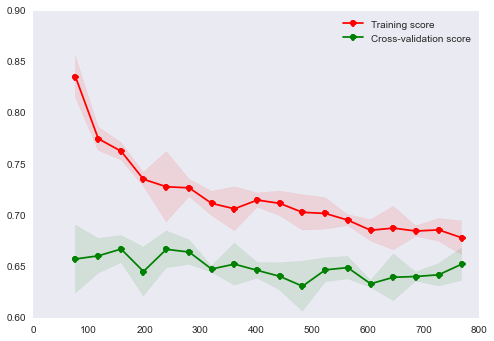

In [87]:
plot_learning_curve(rf, "Random Forest", X_train, y_train, mse_scorer, train_sizes=np.linspace(.1, 1.0, 18))

In [ ]:
plot_model_var_imp(rf, X_train, y_train, 15)

In [ ]:
train_df.shape